<a href="https://colab.research.google.com/github/SohamB21/AlterLogo/blob/main/AlterLogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlterLogo
---
**Description:** This model is designed to mainly modify mainstream logos and to give them a personalized revamp. The core functionalities are :-

*   ***Logo Revamps :*** The main use of this is to breathe a new life into your logos.

Additionally it can also be used to :-

*   ***Stylize Sketches :*** Put custom themes to scribbles and monochrome sketches.

*   ***Generate Artistic Creations :*** Craft artistic and stylized version of your prompt image.

**Tech Stack:**

*Diffusers -* Text-to-image generation foundation.

*ControlNet Models -* targeted image creation and transformation.

*Stable Diffusion -* combines prompts and control for image generation.

*PyTorch -* Handles computations efficiently especally on GPUs.

In [1]:
# installation of packages --quiet

!pip install --upgrade accelerate --quiet
!pip install diffusers --quiet
!pip install controlnet_hinter==0.0.5 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.5/547.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.6 MB/s eta 0:00:00


In [2]:
# dictionary mapping for controlnet model paths and hinter functions
# we mainly require canny, other checkpoints are also given for demonstrating how to use them
# https://huggingface.co/lllyasviel/sd-controlnet-canny

import controlnet_hinter

controlnet_models = {
    "canny": {
        "model_id": "lllyasviel/sd-controlnet-canny",
        "hinter": controlnet_hinter.hint_canny
    },
    "openpose": {
        "model_id": "lllyasviel/sd-controlnet-openpose",
        "hinter": controlnet_hinter.hint_openpose
    },
    "depth": {
        "model_id": "lllyasviel/sd-controlnet-depth",
        "hinter": controlnet_hinter.hint_depth
    },
    "scribble": {
        "model_id": "lllyasviel/sd-controlnet-scribble",
        "hinter": controlnet_hinter.hint_scribble,
    },
    "segmentation": {
        "model_id": "lllyasviel/sd-controlnet-seg",
        "hinter": controlnet_hinter.hint_segmentation,
    },
    "normal": {
        "model_id": "lllyasviel/sd-controlnet-normal",
        "hinter": controlnet_hinter.hint_normal,
    },
    "hed": {
        "model_id": "lllyasviel/sd-controlnet-hed",
        "hinter": controlnet_hinter.hint_hed,
    },
    "hough": {
        "model_id": "lllyasviel/sd-controlnet-mlsd",
        "hinter": controlnet_hinter.hint_hough,
    }
}

In [3]:
# import necessary libraries
from diffusers import DiffusionPipeline, LCMScheduler, DDIMScheduler
from diffusers import AutoPipelineForText2Image, StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image
import torch

# define paths and configurations

# here you can choose the controlnet checkpoint, default key - canny
controlnet_type = "canny"
torch.cuda.empty_cache()
device = "cuda"
controlnet = ControlNetModel.from_pretrained(controlnet_models[controlnet_type]["model_id"], torch_dtype=torch.float16).to(device)

# loading stable diffusion base model with controlnet
pipe = None
base_model_path =  "digiplay/Juggernaut_final"
pipe = StableDiffusionControlNetPipeline.from_pretrained(base_model_path, controlnet=controlnet, torch_dtype=torch.float16).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/593 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/427 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Enter the URL of the image: https://workable-application-form.s3.amazonaws.com/advanced/production/61557f91d9510741dc62e7f8/c3635b59-a3d2-444a-b636-a9d0061dcdde


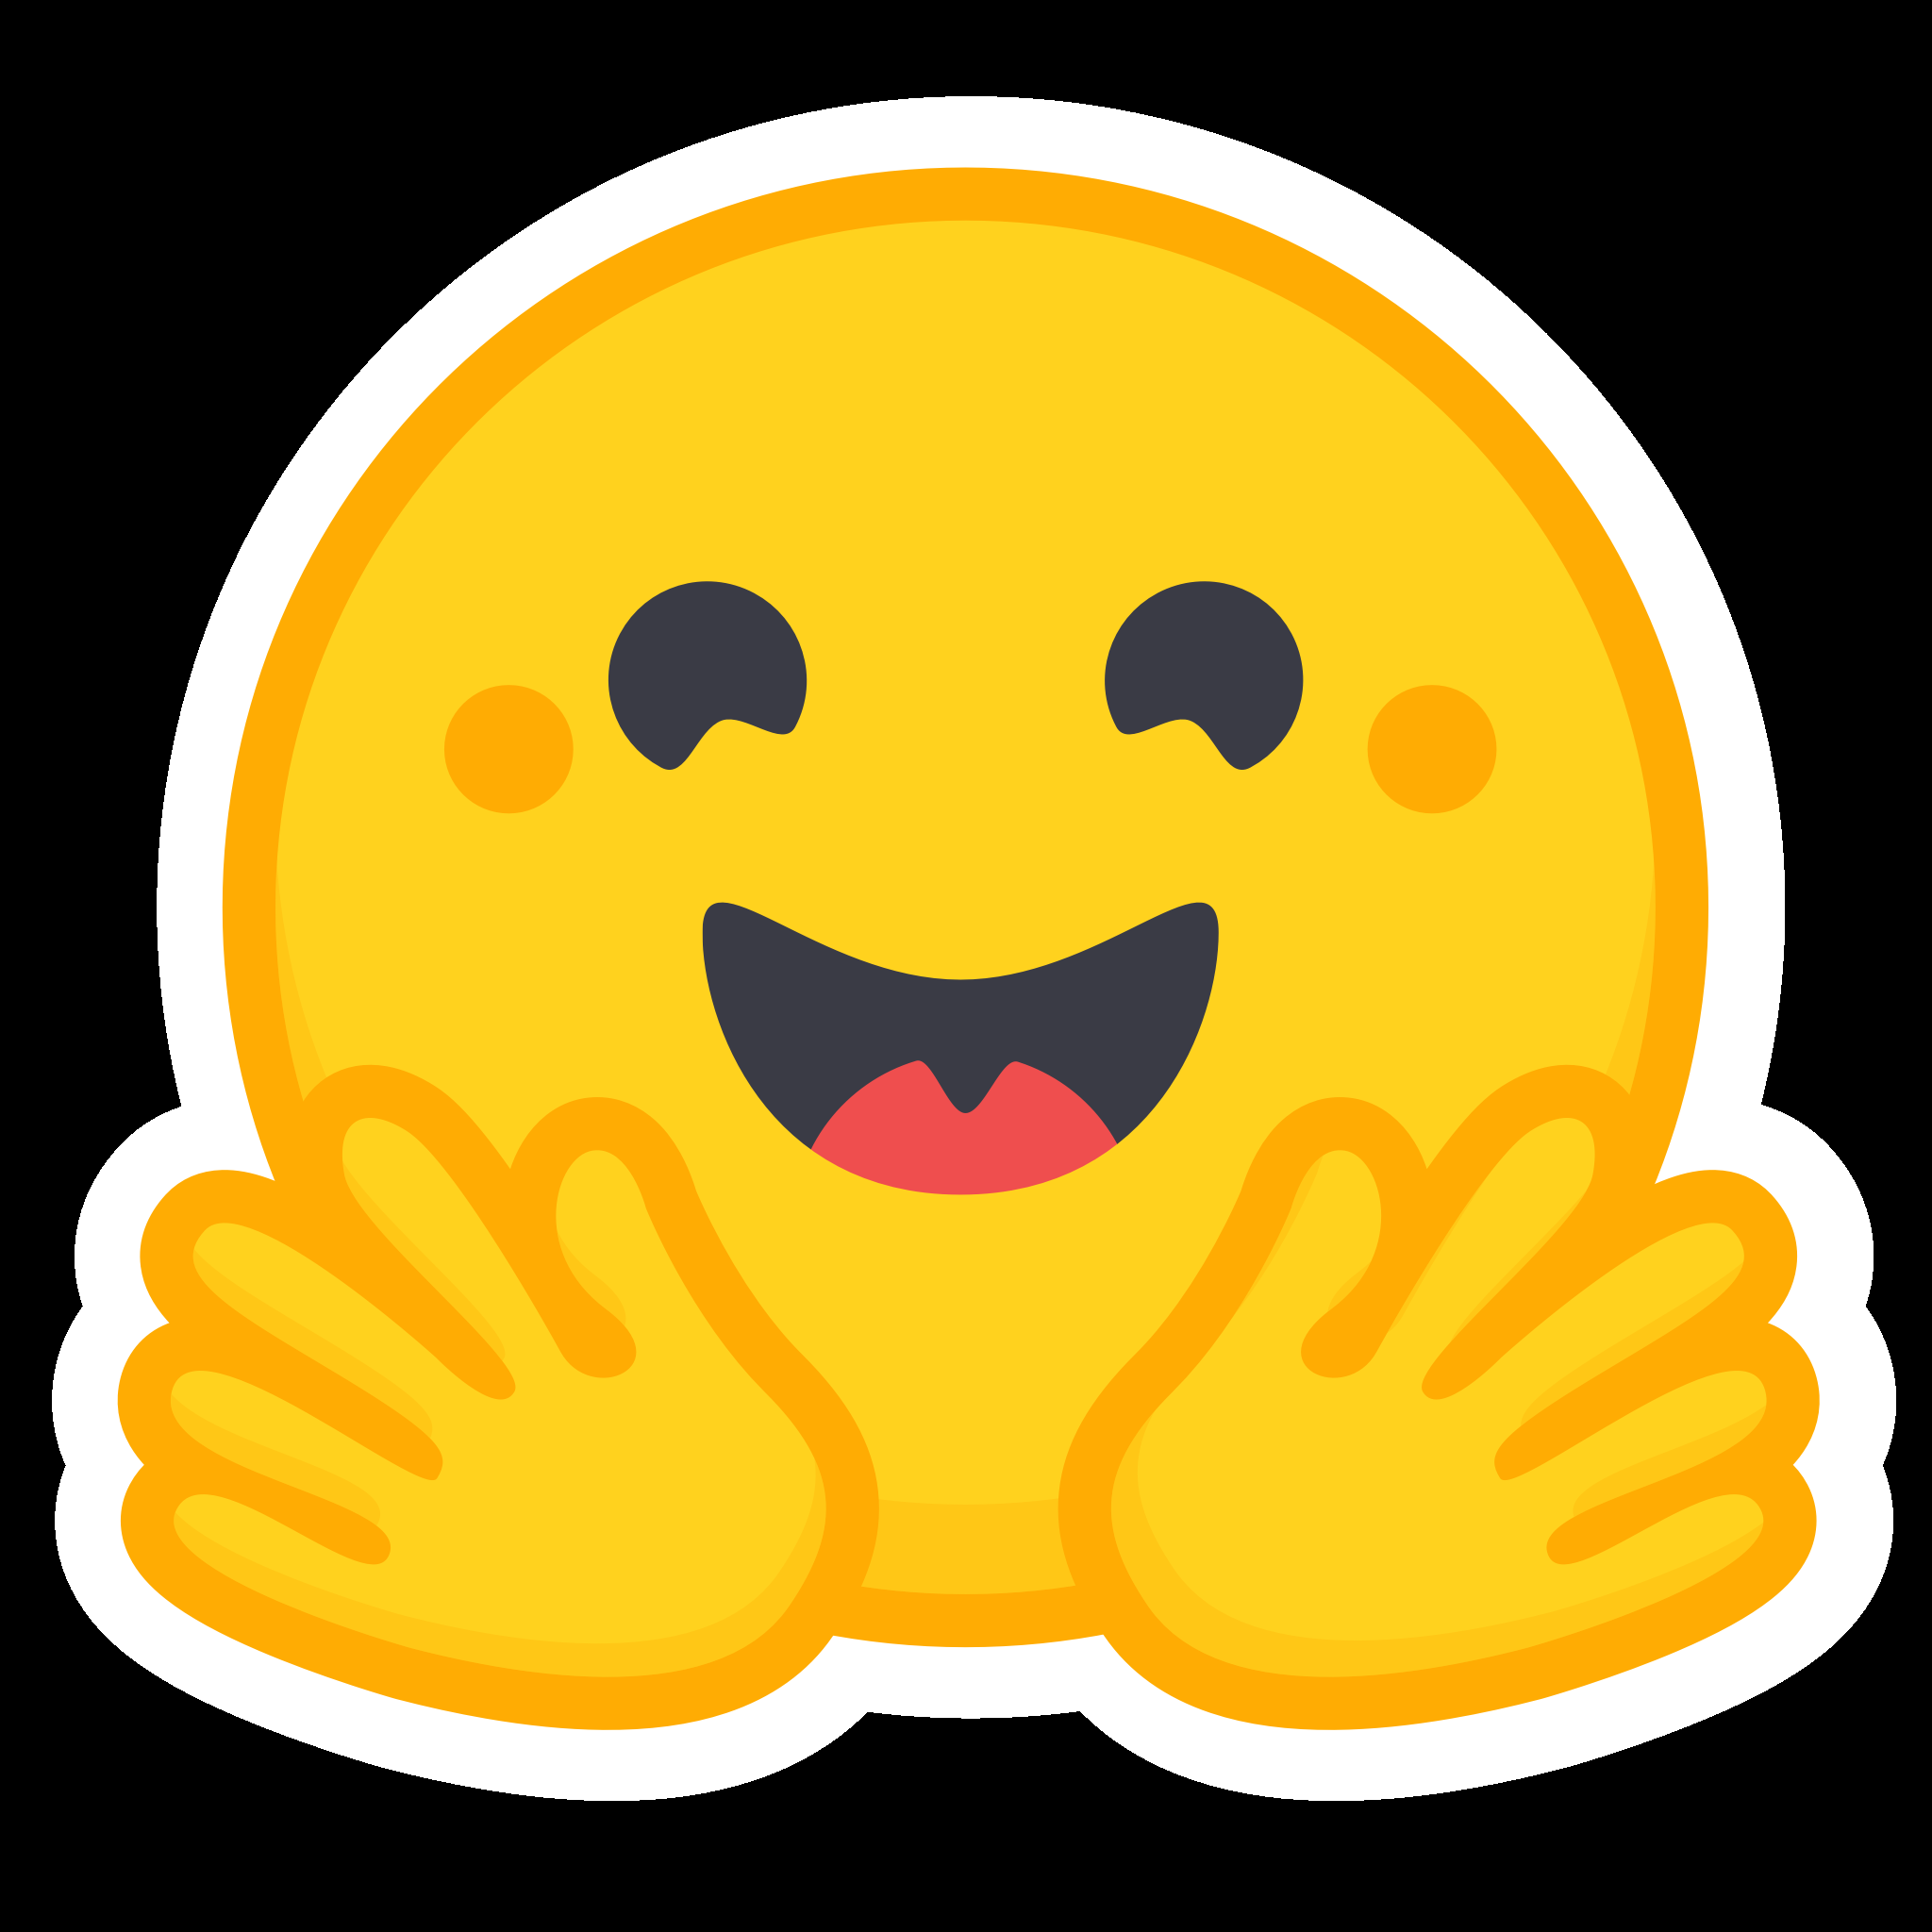

In [4]:
# image input

# Eg : https://i0.wp.com/junilearning.com/wp-content/uploads/2020/06/python-programming-language.webp?fit=800%2C800&ssl=1
# Eg : https://images.squarespace-cdn.com/content/v1/60da2a060458516d04fb196a/bb89e9ca-6f59-4b5c-8d8a-aea4d0b73d29/scribble+art+portrait.JPG

input_image_url = input("Enter the URL of the image: ")
input_image = load_image(input_image_url)
input_image

Enter your desired details for the logo (Eg: descriptive scenery, objects, colors): cute white cat, smiling cat


  0%|          | 0/25 [00:00<?, ?it/s]

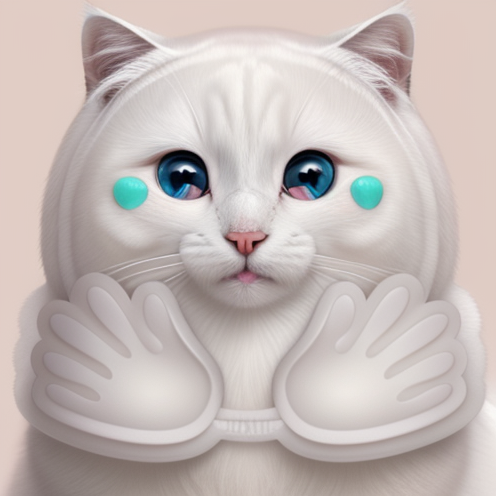

In [10]:
# prompt and negative prompt for the logo

# function to get user prompt - takes additional prompts from user and combines it with base prompt
def get_user_prompt():
  user_prompt = input("Enter your desired details for the logo (Eg: descriptive scenery, objects, colors): ")
  base_prompt = "natural, beautiful, hd, 4k resolution, best quality, intricate details"
  return f"{base_prompt} with {user_prompt}"

# Get user prompt
prompt = get_user_prompt()
negative_prompt = "low quality, blurry, unrealistic anatomy, nonsensical objects, noise, text, watermarks, signatures, duplicate objects, extra limbs, inconsistent lighting"

no_of_steps = 25    # determines no.of refinement iterations the diffusion model performs

guidace_scale = 7.0   # controls adherence to the prompt

controlnet_conditioning_scale=1.0   # influences how much the final image resembles the control image

# input image -> control image
control_image = controlnet_models[controlnet_type]["hinter"](input_image)

# pipeline combining the stable diffusion (T2I) and controlnet (control images) to get the final image
my_images = pipe(
    prompt = prompt,
    negative_prompt = negative_prompt,
    width = 500,
    height = 500,
    image = control_image,
    num_inference_steps = no_of_steps,
    guidance_scale = guidace_scale,
    controlnet_conditioning_scale = controlnet_conditioning_scale
)

final_image = my_images.images[0]
final_image